[Read more about DTs by clicking here.](https://scikit-learn.org/stable/modules/tree.html)

Import locally required modules.

In [1]:
# Add local modules' path
# Restart notebook if you modify these imports' files
import os
import sys

module_path = os.path.abspath(os.path.join("..", "common"))

if module_path not in sys.path:
    sys.path.append(module_path)

# Actual imports
from common import kUtils

Get the split data.

In [2]:
import numpy as np # Used here only for the data type but extensively used later

X_train: np.ndarray; X_test: np.ndarray; X_val: np.ndarray; y_train: np.ndarray; y_test: np.ndarray; y_val: np.ndarray;

X_train, X_test, X_val, y_train, y_test, y_val = kUtils.get_split_data()

Let's normalize our age column.

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

kUtils.get_loaded_data()

kUtils._loaded_data["Age"] = MinMaxScaler().fit_transform(kUtils._loaded_data[['Age']])

Set up the model and train it.

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

#dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model: DecisionTreeClassifier = DecisionTreeClassifier(criterion="entropy",
    max_depth=5,  # Limit the depth of the tree
    min_samples_split=10,  # Require at least 10 samples to split a node
    min_samples_leaf=5,  # Require at least 5 samples per leaf
    random_state=42
)

# for information gain instead of Gini purity: dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

### Metrics

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

y_pred: np.ndarray = dt_model.predict(X_test)
y_pred_prob: np.ndarray | list[np.ndarray] = dt_model.predict_proba(X_test)[:, 1]

accuracy: float = accuracy_score(y_test, y_pred)
conf_matrix: np.ndarray = confusion_matrix(y_test, y_pred)
report: str | dict = classification_report(y_test, y_pred)

print("Decision Tree Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

fpr: np.ndarray; tpr: np.ndarray; thresholds: np.ndarray;

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc: float = auc(fpr, tpr)

Decision Tree Accuracy: 0.9395714285714286
Confusion Matrix:
[[6525  579]
 [ 267 6629]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      7104
         1.0       0.92      0.96      0.94      6896

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



### Plotting the model

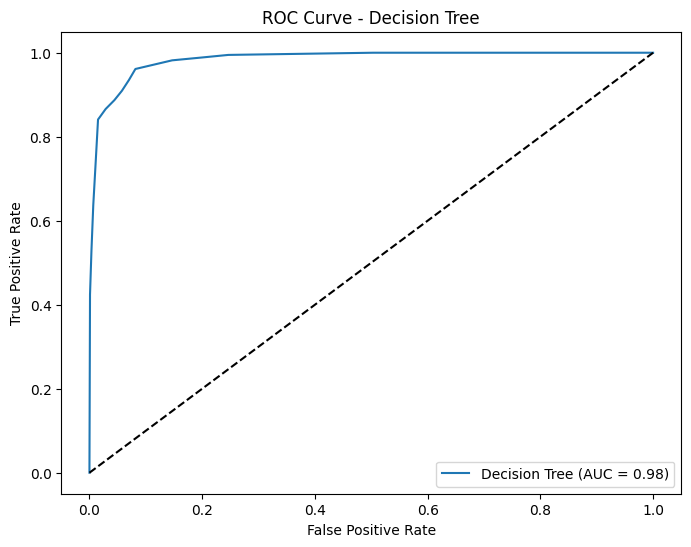

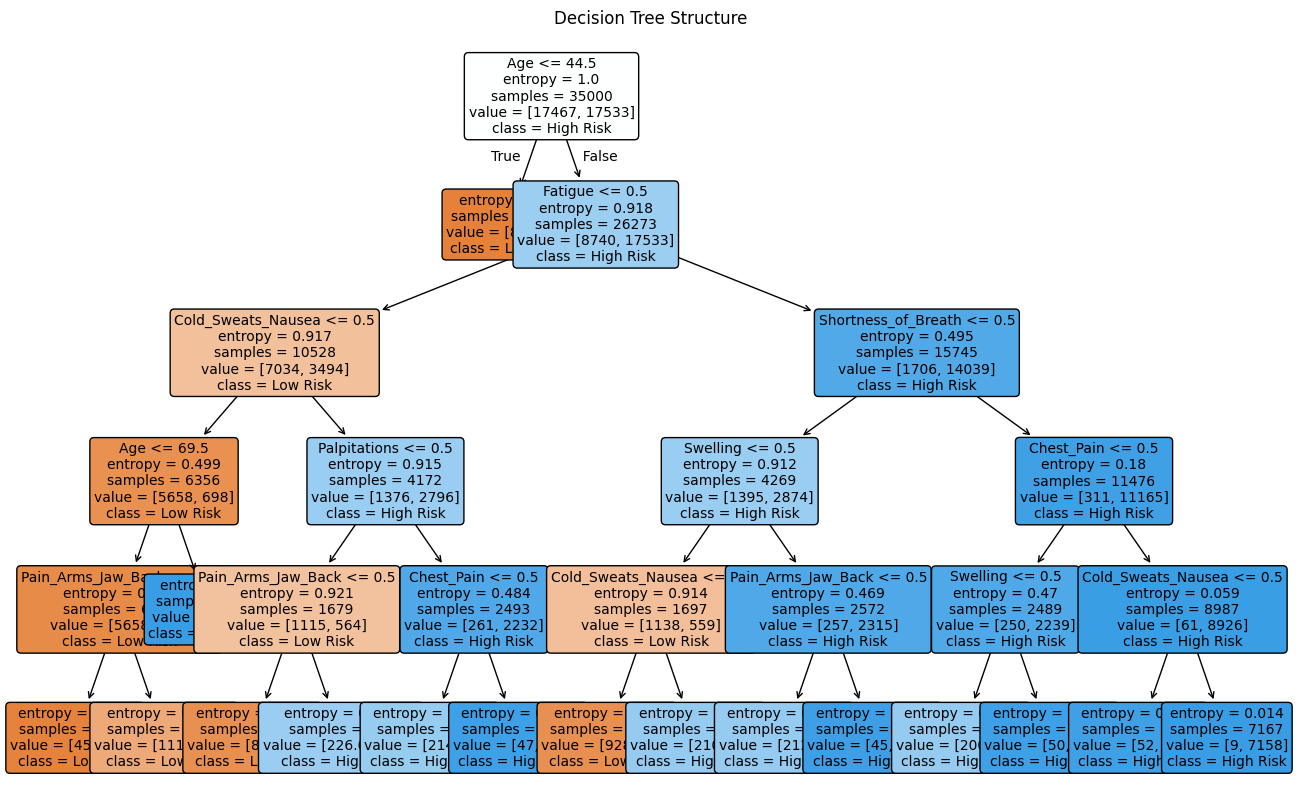

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()
plt.figure(figsize=(16, 10))

feature_list: list[str] = kUtils.get_feature_list()

plot_tree(dt_model, feature_names=feature_list, class_names=["Low Risk", "High Risk"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()